<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/2_vgg/3)%20Differences%20in%20vgg%20and%20vgg_bn%20variants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goals



### Train a classifier using vgg and vgg - batch_norm variants on intel-image-classification dataset

### Understand what all differences happen when switching between vgg variants 

#### For this experiment you will be using mxnet backend

# What is vgg

## Readings on vgg

  1) Points from https://towardsdatascience.com/vgg-neural-networks-the-next-step-after-alexnet-3f91fa9ffe2c
    - VGG addresses another very important aspect of CNNs: depth
    - All of VGG’s hidden layers use ReLU
    - Unlike 11x11 kernels of alexnet, it uses smaller ones 1x1 and 3x3 kernels


  2) Points from https://becominghuman.ai/what-is-the-vgg-neural-network-a590caa72643
    - Intuitively, more layer is better. However, the authors found that VGG-16 is better than VGG-19
    - Authors introduce multi-scale evaluationin the paper
  
  
  3) Read more here - 
    - https://arxiv.org/abs/1409.1556
    - https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/
    - https://www.cs.toronto.edu/~frossard/post/vgg16/
    - https://d2l.ai/chapter_convolutional-modern/vgg.html




## Readings on batch norm

  1) Points from https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/   
    - Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch
    - Training Deep Neural Networks is complicated by the fact that the distribution of each layer’s inputs changes during training, as the parameters of the previous layers change. This slows down the training by requiring lower learning rates and careful parameter initialization, and makes it notoriously hard to train models with saturating nonlinearities.
    - BatchNorm impacts network training in a fundamental way: it makes the landscape of the corresponding optimization problem be significantly more smooth. This ensures, in particular, that the gradients are more predictive and thus allow for use of larger range of learning rates and faster network convergence.



  2) Points from https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c
    - Batch normalization reduces the amount by what the hidden unit values shift around (covariance shift).
    - VGG doesn’t have a batch norm layer in it because batch normalization didn’t exist before VGG      
  
  
  3) Read more here 
    - https://arxiv.org/abs/1502.03167
    - https://medium.com/@ilango100/batch-normalization-speed-up-neural-network-training-245e39a62f85
    - https://mlexplained.com/2018/01/10/an-intuitive-explanation-of-why-batch-normalization-really-works-normalization-in-deep-learning-part-1/


# Table of Contents


## [Install](#0)


## [Load experiment-1 with vgg16 base architecture](#1)


## [Visualize vgg16](#2)


## [Train the 1st classifier](#3)


## [Validate the 1st classifier ](#4)


## [Load experiment-2 with vgg16-bn base architecture](#5)


## [Visualize vgg16-bn](#6)


## [Train the 2nd classifier](#7)


## [Validate the 2nd classifier ](#8)


## [Compare experiments 1 and 2](#9)



<a id='0'></a>
# Install Monk

## Using pip (Recommended)

  - colab (gpu) 
      - All bakcends: `pip install -U monk-colab`
      

  - kaggle (gpu) 
      - All backends: `pip install -U monk-kaggle`
      

  - cuda 10.2	
      - All backends: `pip install -U monk-cuda102`
      - Gluon bakcned: `pip install -U monk-gluon-cuda102`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda102`
      - Keras backend: `pip install -U monk-keras-cuda102`
      

  - cuda 10.1	
      - All backend: `pip install -U monk-cuda101`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda101`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda101`
	  - Keras backend: `pip install -U monk-keras-cuda101`
      

  - cuda 10.0	
      - All backend: `pip install -U monk-cuda100`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda100`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda100`
	  - Keras backend: `pip install -U monk-keras-cuda100`
      

  - cuda 9.2	
      - All backend: `pip install -U monk-cuda92`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda92`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda92`
	  - Keras backend: `pip install -U monk-keras-cuda92`
      

  - cuda 9.0	
      - All backend: `pip install -U monk-cuda90`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda90`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda90`
	  - Keras backend: `pip install -U monk-keras-cuda90`
      

  - cpu 		
      - All backend: `pip install -U monk-cpu`
	  - Gluon bakcned: `pip install -U monk-gluon-cpu`
	  - Pytorch backend: `pip install -U monk-pytorch-cpu`
	  - Keras backend: `pip install -U monk-keras-cpu`

## Install Monk Manually (Not recommended)
 
### Step 1: Clone the library
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 
 
 
### Step 2: Install requirements 
 - Linux
     - Cuda 9.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu90.txt`
     - Cuda 9.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu92.txt`
     - Cuda 10.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu100.txt`
     - Cuda 10.1
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu101.txt`
     - Cuda 10.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Linux && pip install -r requirements_cpu.txt`
 
 
  - Windows
     - Cuda 9.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu90.txt`
     - Cuda 9.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu92.txt`
     - Cuda 10.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu100.txt`
     - Cuda 10.1 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu101.txt`
     - Cuda 10.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cpu.txt`
         
         
  - Mac
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Mac && pip install -r requirements_cpu.txt`
         
         
  - Misc
      - Colab (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_colab.txt`
      - Kaggle (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt`
 
 
 
### Step 3: Add to system path (Required for every terminal or kernel run)
 - `import sys`
 - `sys.path.append("monk_v1/");`

## Dataset - Intel Image Classification
    - https://www.kaggle.com/puneet6060/intel-image-classification

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Ew1ueuspWHKKLykoKV3KTRaEl_sQZ4tt' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Ew1ueuspWHKKLykoKV3KTRaEl_sQZ4tt" -O intel-image-classification.zip && rm -rf /tmp/cookies.txt

In [2]:
! unzip -qq intel-image-classification.zip

# Imports

In [2]:
#Using mxnet-gluon backend 

# When installed using pip
from monk.gluon_prototype import prototype


# When installed manually (Uncomment the following)
#import os
#import sys
#sys.path.append("monk_v1/");
#sys.path.append("monk_v1/monk/");
#from monk.gluon_prototype import prototype

<a id='1'></a>
# Load experiment with vgg-16 base architecture

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [4]:
gtf = prototype(verbose=1);
gtf.Prototype("Compare-vgg-vgg_bn", "vgg-16");

Mxnet Version: 1.5.0

Experiment Details
    Project: Compare-vgg-vgg_bn
    Experiment: vgg-16
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-vgg_bn/vgg-16/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Compare-vgg-depth
                        |
                        |
                        |-----vgg-11
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

## Set dataset and select the model

## Quick mode training

    - Using Default Function
        - dataset_path
        - model_name
        - freeze_base_network
        - num_epochs
        
        
## Sample Dataset folder structure

    intel-image-classification
        |
        |-----train
                |------buildings
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------forest
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)   
                |------.... (and so on)
         |
         |
         |-----val
                |------buildings
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------forest
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)   
                |------.... (and so on)

In [5]:
gtf.Default(dataset_path="intel-image-classification/seg_train/seg_train", 
            model_name="vgg16", 
            freeze_base_network=False,
            num_epochs=5);

Dataset Details
    Train path:     intel-image-classification/seg_train/seg_train
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 9823
    Num val images:   4211
    Num classes:      6

Model Params
    Model name:           vgg16
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           vgg16
        Num of potentially trainable layers:  16
        Num o

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


## From the summary above

    - Model Params
        Model name:                           vgg16
        Num of potentially trainable layers:  16
        Num of actual trainable layers:       16

<a id='2'></a>
# Visualize vgg-16

In [5]:
gtf.Visualize_With_Netron(data_shape=(3, 224, 224), port=8082);

Using Netron To Visualize
Not compatible on kaggle
Compatible only for Jupyter Notebooks
Serving 'model-symbol.json' at http://localhost:8082


## vgg block - 1
  
  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

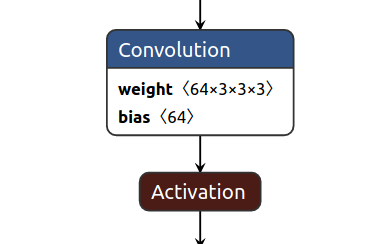

In [20]:
from IPython.display import Image
Image(filename='imgs/vgg_block1_mxnet.png') 

## Properties

  - This block has 3 layers
        - conv -> relu

## vgg block - 2
  
  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

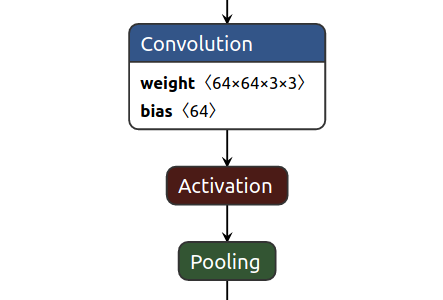

In [21]:
from IPython.display import Image
Image(filename='imgs/vgg_block2_mxnet.png') 

## Properties

  - This block has 3 layers
        - conv -> relu -> max_pool

## vgg fully connected chain
  - This is from vgg16 - so the weights will be different for vgg11

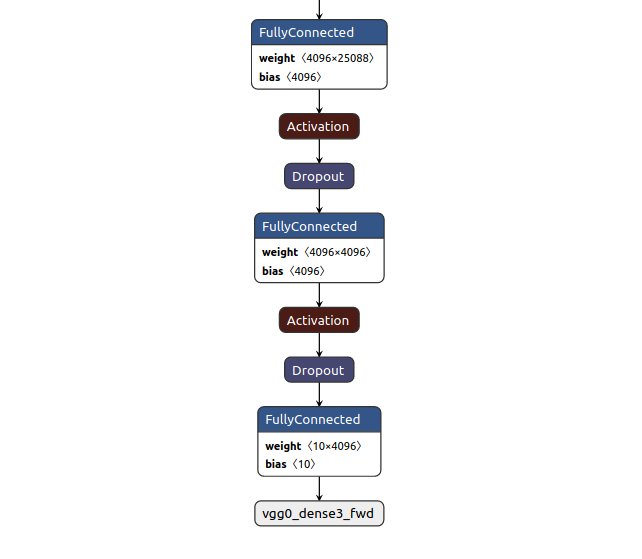

In [23]:
from IPython.display import Image
Image(filename='imgs/vgg_block_fc_mxnet.png') 

## vgg-16 Network

  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

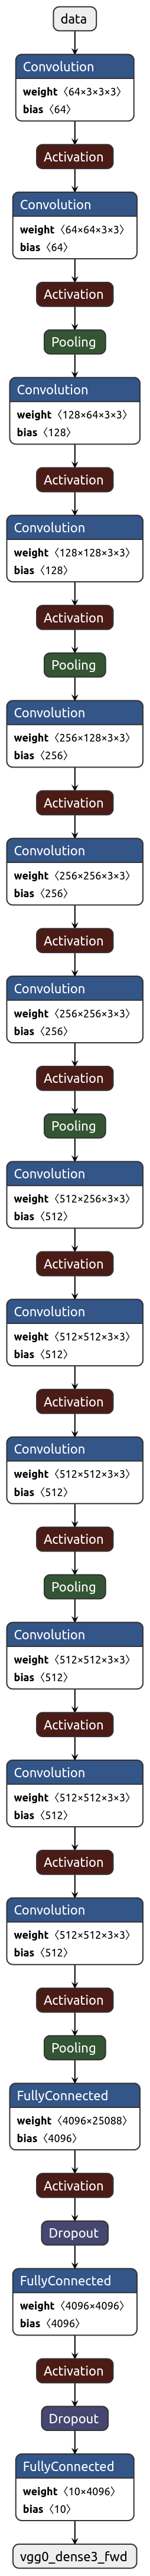

In [6]:
from IPython.display import Image
Image(filename='imgs/vgg16_mxnet.png') 

## Properties

  - This network 
    - has 9 type-1 blocks
    - has 5 type-2 blocks
    - post these blocks the type-3 (fc) block exists
    
    
  - To see what blocks are see notebooks 1.1, 1.2, 1.3 in this same folder


<a id='3'></a>
# Train the classifier

In [7]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.001
    [Epoch 1] Train-acc: 0.880, Train-loss: 0.331 | Val-acc: 0.925196, Val-loss: 0.222, | time: 212.1 sec

    Epoch 2/5
    ----------




    curr_lr - 0.00098
    [Epoch 2] Train-acc: 0.935, Train-loss: 0.193 | Val-acc: 0.933270, Val-loss: 0.190, | time: 215.6 sec

    Epoch 3/5
    ----------




    curr_lr - 0.0009603999999999999
    [Epoch 3] Train-acc: 0.945, Train-loss: 0.153 | Val-acc: 0.937307, Val-loss: 0.198, | time: 217.2 sec

    Epoch 4/5
    ----------




    curr_lr - 0.0009411919999999999
    [Epoch 4] Train-acc: 0.955, Train-loss: 0.130 | Val-acc: 0.930420, Val-loss: 0.200, | time: 211.0 sec

    Epoch 5/5
    ----------




    curr_lr - 0.0009223681599999998
    [Epoch 5] Train-acc: 0.961, Train-loss: 0.108 | Val-acc: 0.919497, Val-loss: 0.253, | time: 210.4 sec

    Training completed in: 17m 20s
    Best val Acc:          0.937307

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-vgg_bn/vgg-16/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-vgg_bn/vgg-16/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history 

<Figure size 432x288 with 0 Axes>

<a id='4'></a>
# Validate the classifier

In [8]:
gtf = prototype(verbose=1);
gtf.Prototype("Compare-vgg-vgg_bn", "vgg-16", eval_infer=True);

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/Compare-vgg-vgg_bn/vgg-16/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Compare-vgg-vgg_bn
    Experiment: vgg-16
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-vgg_bn/vgg-16/



In [9]:
gtf.Dataset_Params(dataset_path="intel-image-classification/seg_test/seg_test");
gtf.Dataset();

Dataset Details
    Test path:      intel-image-classification/seg_test/seg_test
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 3000
    Num classes:      6



### Run Validation

In [10]:
accuracy, class_based_accuracy = gtf.Evaluate();

Testing



    Result
        class based accuracies
            0. buildings - 89.01601830663616 %
            1. forest - 99.36708860759494 %
            2. glacier - 74.14104882459313 %
            3. mountain - 96.76190476190476 %
            4. sea - 95.29411764705881 %
            5. street - 97.80439121756487 %
        total images:            3000
        num correct predictions: 2754
        Average accuracy (%):    91.8



### Achieved acccuracy - 91.8%
(You may get a different result)

<a id='5'></a>
# Load experiment with vgg-16_bn base architecture

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [11]:
gtf = prototype(verbose=1);
gtf.Prototype("Compare-vgg-vgg_bn", "vgg-16-bn");

Mxnet Version: 1.5.0

Experiment Details
    Project: Compare-vgg-depth
    Experiment: vgg-16-bn
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-depth/vgg-16-bn/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Compare-vgg-depth
                        |
                        |
                        |-----vgg-16 (created before)
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)
                         |
                         |
                         |-----vgg-16-bn (created now)
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

## Set dataset and select the model

## Quick mode training

    - Using Default Function
        - dataset_path
        - model_name
        - freeze_base_network
        - num_epochs
        
        
## Sample Dataset folder structure

    10-monkey-species
        |
        |-----train
                |------buildings
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------forest
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)   
                |------.... (and so on)
         |
         |
         |-----val
                |------buildings
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------forest
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)   
                |------.... (and so on)

In [12]:
gtf.Default(dataset_path="intel-image-classification/seg_train/seg_train", 
            model_name="vgg16_bn", 
            freeze_base_network=False,
            num_epochs=5);

Dataset Details
    Train path:     intel-image-classification/seg_train/seg_train
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 9823
    Num val images:   4211
    Num classes:      6

Model Params
    Model name:           vgg16_bn
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model
Model file is not found. Downloading.


500317KB [01:49, 4568.01KB/s]                            


    Model Loaded on device
        Model name:                           vgg16_bn
        Num of potentially trainable layers:  29
        Num of actual trainable layers:       29

Optimizer
    Name:          sgd
    Learning rate: 0.001
    Params:        {'lr': 0.001, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   steplr
    Params: {'step_size': 1, 'gamma': 0.98, 'last_epoch': -1}

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}

Training params
    Num Epochs: 5

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_



monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


## From the summary above

    - Model Params
        Model name:                           vgg16_bn
        Num of potentially trainable layers:  29
        Num of actual trainable layers:       29

<a id='6'></a>
# Visualize vgg-16_bn

In [18]:
gtf.Visualize_With_Netron(data_shape=(3, 224, 224), port=8083);

Using Netron To Visualize
Not compatible on kaggle
Compatible only for Jupyter Notebooks

Stopping http://localhost:8083
Serving 'model-symbol.json' at http://localhost:8083


## vgg-bn block - 1
  
  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

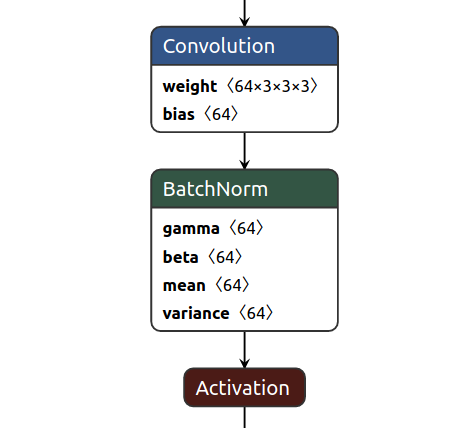

In [14]:
from IPython.display import Image
Image(filename='imgs/vgg_bn_block1_mxnet.png') 

## Properties

  - This block has 3 layers
        - conv -> batchnorm -> relu

## vgg-bn block - 2
  
  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

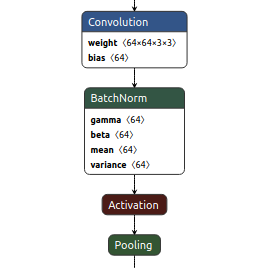

In [20]:
from IPython.display import Image
Image(filename='imgs/vgg_bn_block2_mxnet.png') 

## Properties

  - This block has 4 layers
        - conv -> batchnorm -> relu -> max_pool

## vgg fully connected chain

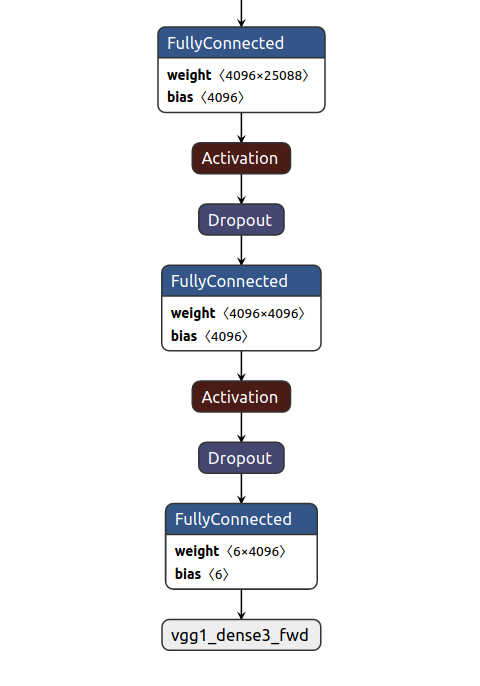

In [16]:
from IPython.display import Image
Image(filename='imgs/vgg_bn_block_fc_mxnet.png') 

## vgg-16-bn Network

  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

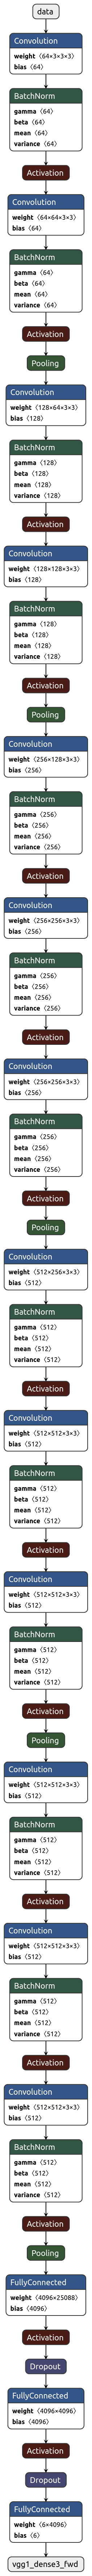

In [17]:
from IPython.display import Image
Image(filename='imgs/vgg16_bn_mxnet.png') 

## Properties

  - This network 
    - has 5 type-1 blocks
    - has 4 type-2 blocks
    - post these blocks the type-3 (fc) block exists
    

<a id='7'></a>
# Train the classifier

In [22]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.001
    [Epoch 1] Train-acc: 0.827, Train-loss: 0.473 | Val-acc: 0.891712, Val-loss: 0.329, | time: 226.8 sec

    Epoch 2/5
    ----------




    curr_lr - 0.00098
    [Epoch 2] Train-acc: 0.902, Train-loss: 0.274 | Val-acc: 0.897649, Val-loss: 0.275, | time: 239.7 sec

    Epoch 3/5
    ----------




    curr_lr - 0.0009603999999999999
    [Epoch 3] Train-acc: 0.928, Train-loss: 0.215 | Val-acc: 0.911897, Val-loss: 0.268, | time: 239.2 sec

    Epoch 4/5
    ----------




    curr_lr - 0.0009411919999999999
    [Epoch 4] Train-acc: 0.933, Train-loss: 0.191 | Val-acc: 0.908810, Val-loss: 0.257, | time: 232.9 sec

    Epoch 5/5
    ----------




    curr_lr - 0.0009223681599999998
    [Epoch 5] Train-acc: 0.943, Train-loss: 0.154 | Val-acc: 0.913560, Val-loss: 0.264, | time: 239.2 sec

    Training completed in: 19m 8s
    Best val Acc:          0.913560

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-depth/vgg-16-bn/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-depth/vgg-16-bn/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy histo

<Figure size 432x288 with 0 Axes>

<a id='8'></a>
# Validate the classifier

In [23]:
gtf = prototype(verbose=1);
gtf.Prototype("Compare-vgg-vgg_bn", "vgg-16-bn", eval_infer=True);

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/Compare-vgg-depth/vgg-16-bn/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Compare-vgg-depth
    Experiment: vgg-16-bn
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-depth/vgg-16-bn/



In [24]:
gtf.Dataset_Params(dataset_path="intel-image-classification/seg_test/seg_test");
gtf.Dataset();

Dataset Details
    Test path:      intel-image-classification/seg_test/seg_test
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 3000
    Num classes:      6



### Run Validation

In [25]:
accuracy, class_based_accuracy = gtf.Evaluate();

Testing



    Result
        class based accuracies
            0. buildings - 93.82151029748283 %
            1. forest - 99.36708860759494 %
            2. glacier - 85.53345388788426 %
            3. mountain - 89.90476190476191 %
            4. sea - 98.82352941176471 %
            5. street - 91.41716566866268 %
        total images:            3000
        num correct predictions: 2788
        Average accuracy (%):    92.93333333333334



### Achieved acccuracy - 92.9%
(You may get a different result)

<a id='11'></a>
# Comparing all the experiments

In [26]:
# Invoke the comparison class
from monk.compare_prototype import compare

### Creating and managing comparison experiments
        - Provide project name

In [27]:
# Create a project 
gtf = compare(verbose=1);
gtf.Comparison("Compare-effect-of-batch_norm");

Comparison: - Compare-effect-of-batch_norm


### This creates files and directories as per the following structure
    
    workspace
        |
        |--------comparison
                        |
                        |
                        |-----Compare-effect-of-network-depth
                                    |
                                    |------stats_best_val_acc.png
                                    |------stats_max_gpu_usage.png
                                    |------stats_training_time.png
                                    |------train_accuracy.png
                                    |------train_loss.png
                                    |------val_accuracy.png
                                    |------val_loss.png
                                    
                        |
                        |-----comparison.csv (Contains necessary details of all experiments)

### Add the experiments
        - First argument - Project name
        - Second argument - Experiment name

In [28]:
gtf.Add_Experiment("Compare-vgg-vgg_bn", "vgg-16");
gtf.Add_Experiment("Compare-vgg-vgg_bn", "vgg-16-bn");

Project - Compare-vgg-vgg_bn, Experiment - vgg-16 added
Project - Compare-vgg-depth, Experiment - vgg-16-bn added


## Run Analysis

In [29]:
gtf.Generate_Statistics();

Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## Visualize and study comparison metrics

### Training Accuracy Curves

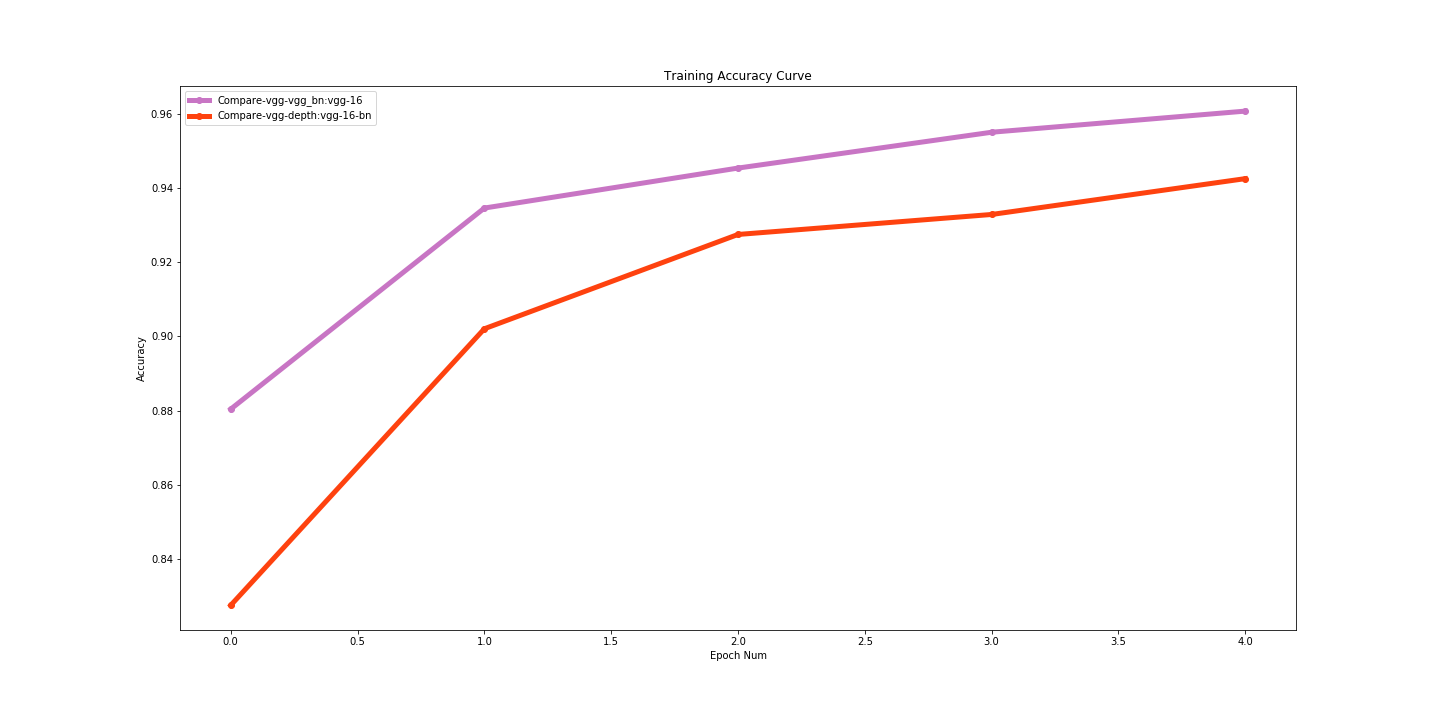

In [30]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-batch_norm/train_accuracy.png") 

### Training Loss Curves

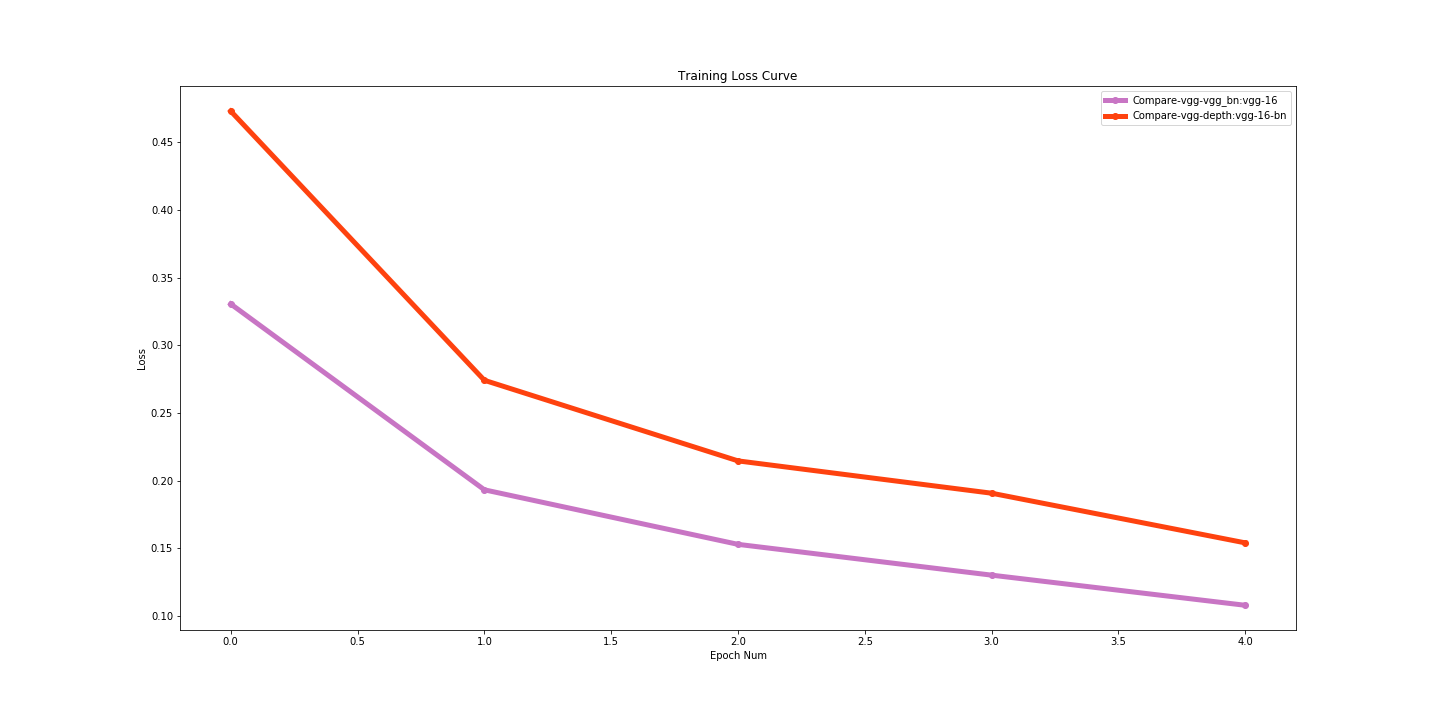

In [31]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-batch_norm/train_loss.png") 

### Validation Accuracy Curves

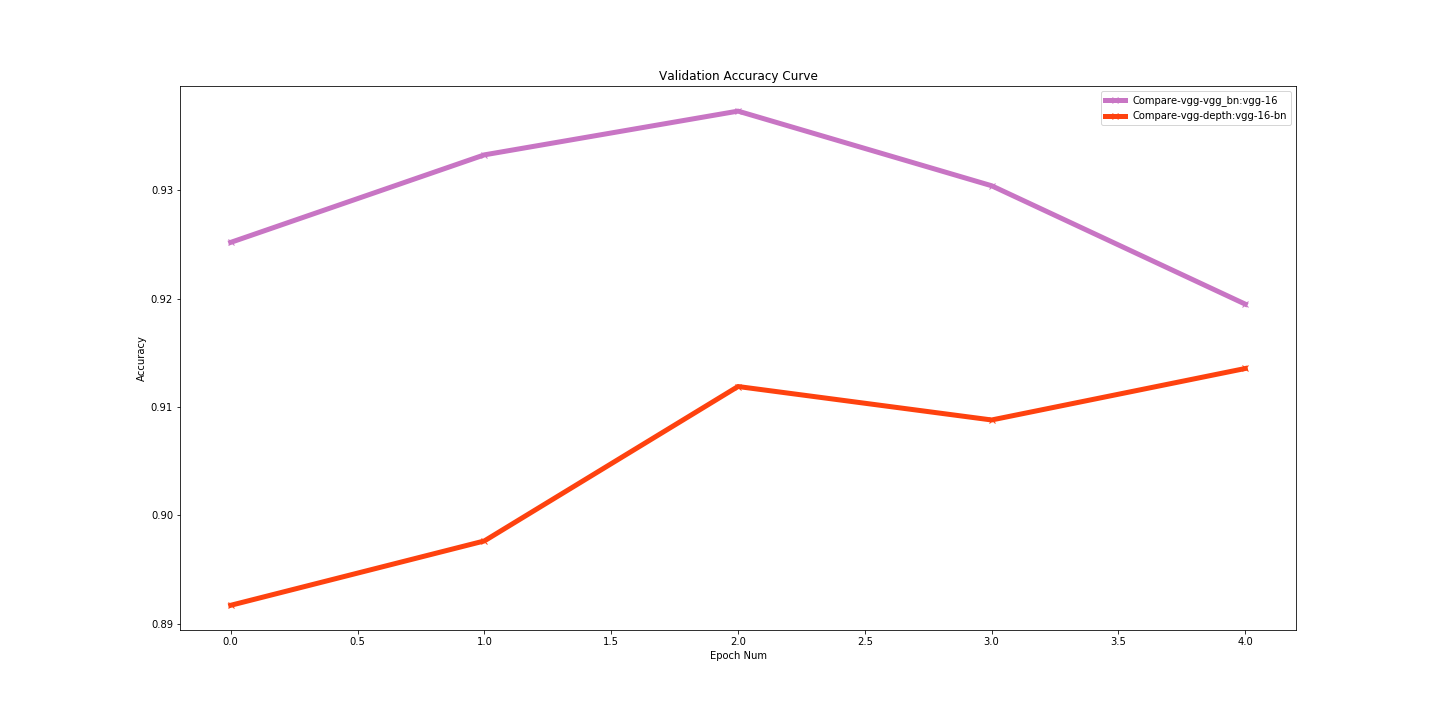

In [32]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-batch_norm/val_accuracy.png") 

### Validation loss curves

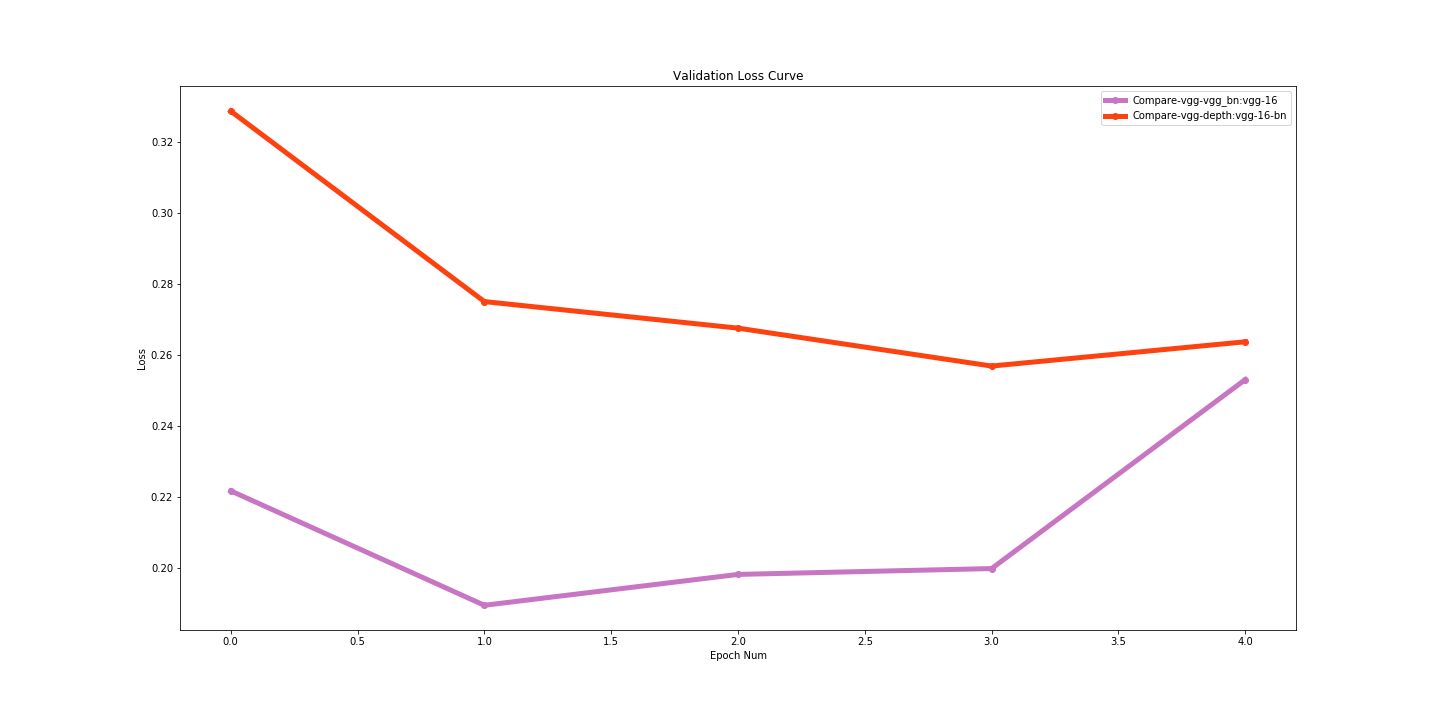

In [33]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-batch_norm/val_loss.png") 

### Training Times and max gpu usages

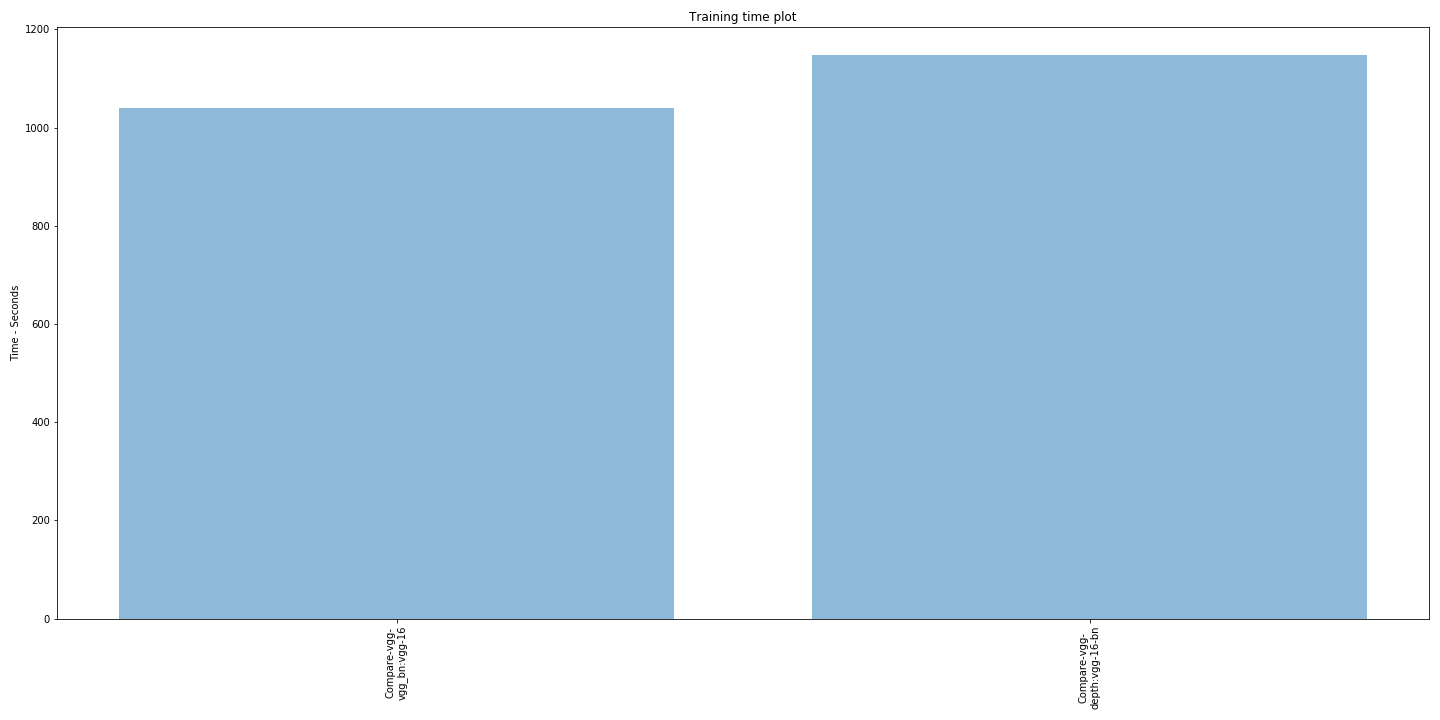

In [34]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-batch_norm/stats_training_time.png") 

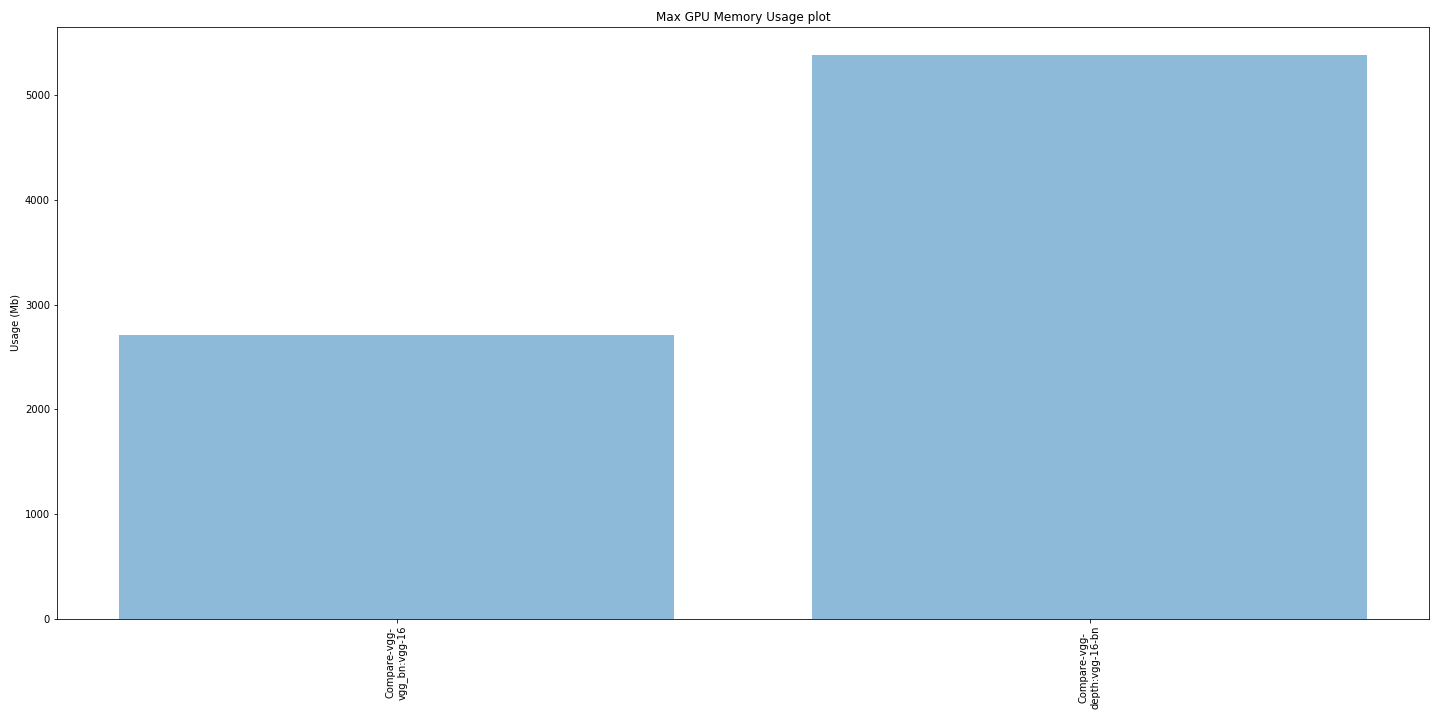

In [35]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-batch_norm/stats_max_gpu_usage.png") 

# Comparisons 
#### You may get differet results

    Network  |   Type-1 Blocks    |   Type-2 Blocks   |   Val Acc   | Training time (sec)  |  Gpu Usage (mb)   
    
    
    vgg-16   |         9          |        5          |     91.8    |        1050          |       2800
    
    
    
    vgg16-bn |         9          |        5          |     92.9    |        1150          |       5500
    
    
    
    